## Imports

In [2]:
from numpy.random import seed
seed(888)

In [120]:
import os
import numpy as np
import tensorflow as tf
tf.random.set_seed(404)

import keras
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime
from pathlib import Path
import itertools

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [114]:
LOG_DIR = 'tenserboard_cifar_logs\\'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Forg', 'Horse', 'Ship', 'Truck']
IAMGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IAMGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

## Get the Data

In [5]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [6]:
type(cifar10)

module

In [7]:
type(x_train_all)

numpy.ndarray

# Explore the Data

In [8]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

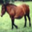

In [9]:
pic = array_to_img(x_train_all[7])
display(pic)

In [10]:
y_train_all.shape

(50000, 1)

In [11]:
y_train_all[7][0]

7

In [12]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

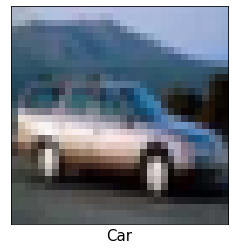

In [13]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.xticks([])
plt.yticks([])
plt.show()

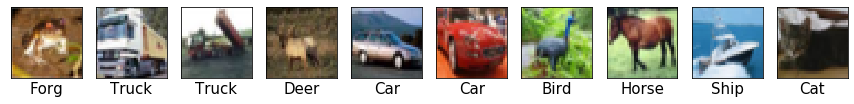

In [14]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train_all[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=15)

In [15]:
x_train_all.shape

(50000, 32, 32, 3)

In [16]:
nr_image, x, y, c = x_train_all.shape
print(f'images = {nr_image} \t| width = {x} \t| heigth = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| heigth = 32 	| channels = 3


In [17]:
x_test.shape

(10000, 32, 32, 3)

# Preporcess Data

In [18]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [19]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [20]:
type(x_train_all[0][0][0][0])

numpy.float64

In [21]:
x_train_all[0][0][0][0]

0.23137254901960785

In [22]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [23]:
x_train_all.shape

(50000, 3072)

In [24]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test {x_test.shape}')

Shape of x_test (10000, 3072)


### Create Validation Dataset

In [25]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [26]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

### Create a small dataset (for illustration)

In [27]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

## Define the Neural Network using Keras

In [74]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_output')
], name='model_1')

model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [75]:
model_2 = Sequential(name='model_2')
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [76]:
model_3 = Sequential(name='model_3')
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(15, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [29]:
type(model_1)

keras.engine.sequential.Sequential

In [30]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [31]:
32*32*3*128 +128 + (128*64 + 64) + (64*16 + 16) + (16*10 + 10)

402810

## Tenserboard (visualising learning)

In [64]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M %S %d")}'
    dir_paths = Path(f'{LOG_DIR}/{folder_name}')

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err)
    else:
        print('Successfully created directory')
        
    return TensorBoard(log_dir=dir_paths, profile_batch=100000000)

## Fit the Model

In [78]:
samples_per_batch = 1000

In [59]:
# %%time

# nr_epochs = 150

# model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs, callbacks=[get_tensorboard('model_1')], 
#            verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 1min 17s


In [73]:
# %%time

# nr_epochs = 150

# model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs, callbacks=[get_tensorboard('model_2')], 
#            verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 1min 9s


In [79]:
%%time
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 3min 44s


In [80]:
%%time
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 5min 28s


In [81]:
%%time
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 3 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 5min 35s


## Predictions on Individual Images

In [88]:
x_val[0].shape

(3072,)

In [91]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [95]:
np.set_printoptions(precision=3)

In [96]:
model_2.predict(test)

array([[0.036, 0.002, 0.059, 0.143, 0.112, 0.179, 0.355, 0.112, 0.001,
        0.001]], dtype=float32)

In [98]:
model_2.predict(x_val).shape

(10000, 10)

In [99]:
model_2.predict_classes(test)

array([6], dtype=int64)

In [100]:
y_val[0]

array([6], dtype=uint8)

In [101]:
for i in range(10):
    test_img = np.expand_dims(x_val[i], axis=0)
    predicted_value = model_2.predict_classes(test_img)[0]
    print(f'Actual value: {y_val[i][0]}  vs. Predicted value: {predicted_value}')

Actual value: 6  vs. Predicted value: 6
Actual value: 9  vs. Predicted value: 1
Actual value: 9  vs. Predicted value: 9
Actual value: 4  vs. Predicted value: 6
Actual value: 1  vs. Predicted value: 8
Actual value: 1  vs. Predicted value: 3
Actual value: 2  vs. Predicted value: 2
Actual value: 7  vs. Predicted value: 7
Actual value: 8  vs. Predicted value: 8
Actual value: 3  vs. Predicted value: 9


## Evaluation

In [102]:
model_2.metrics_names

['loss', 'accuracy']

In [104]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

10000/10000 [==============================] - 1s 73us/sample - loss: 1.4389 - accuracy: 0.4830
Test loss is 1.44 and test accuracy is 48.3%


## Confusion Matrix

In [106]:
conf_matrix = confusion_matrix(y_test, model_2.predict_classes(x_test))

In [107]:
conf_matrix.shape

(10, 10)

In [108]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [109]:
conf_matrix.max()

687

In [110]:
conf_matrix.min()

7

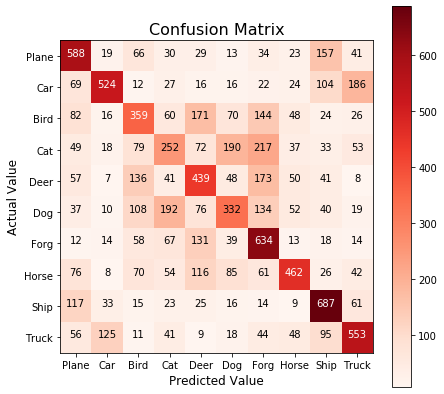

In [122]:
plt.figure(figsize=(7,7))
plt.imshow(conf_matrix, cmap=plt.cm.Reds)

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Value', fontsize=12)
plt.ylabel('Actual Value', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center', 
             color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

plt.show()

In [124]:
# True Positive
np.diag(conf_matrix)

array([588, 524, 359, 252, 439, 332, 634, 462, 687, 553], dtype=int64)

In [125]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.588, 0.524, 0.359, 0.252, 0.439, 0.332, 0.634, 0.462, 0.687,
       0.553])

In [126]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.514, 0.677, 0.393, 0.32 , 0.405, 0.401, 0.429, 0.603, 0.561,
       0.551])

In [128]:
avg_recall = np.mean(recall)
print(f'Model 2 recall is {avg_recall:.2%}')

Model 2 recall is 48.30%


In [129]:
avg_precision = np.mean(precision)
print(f'Model 2 precision is {avg_precision:.2%}')

f_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 f score is {f_score:.2%}')

Model 2 precision is 48.55%
Model 2 f score is 48.43%
